In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical 

In [2]:
#구 이름 전부 적어놓기
gooList = '강서구 금정구 기장군 남구 동구 동래구 부산진구 북구 사상구 사하구 서구 수영구 연제구 영도구 중구 해운대구'.split()



In [3]:
#data prepartion
def sdf(name):
    df = pd.read_csv(name+'.csv')
    df.insert(2, "gooName", name, True)
    return df
init_df = pd.read_csv('강서구.csv')
init_df.insert(2, "gooName", '강서구', True)

#모든 구 하나로 묶기
for k in gooList[1:]:
    init_df = pd.concat([init_df,sdf(k)], ignore_index=True)
df = init_df
df.sample(frac=0.1, replace=True).head()

#결측치 제거
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [4]:
replaceDic ={'총강수량(mm)': 'total_rain','강수계속시간(시간)':'rain_duration','최다강수1H':'max_rain',
                   '일강수량(mm)':'daily_rain','누적 강수량(mm)-2일':'culmu_rain_2','누적 강수량(mm)-3일':'culmu_rain_3',
                   '최대풍속(m/s)':'max_wind','평균기온(℃)':'avg_temp','기간(일)':'duration' ,'침수면적(1,000㎡)':'sunk','태풍':'typhoon','피해액(백만원)':'damage'}
df = df.rename(columns = replaceDic)

In [5]:
#one_hot_encoding gooName
onehotGoo = pd.get_dummies(df['gooName'],dtype = int)
#onehotGoo.sample(frac=0.1, replace=True).head()

#one_hot_encoding gooName
onehotTyphoon= pd.get_dummies(df['typhoon'],dtype = int)
#onehotTyphoon.sample(frac=0.1, replace=True).head()


my_land =onehotGoo.columns.values.tolist()
my_typhoon = onehotTyphoon.columns.values.tolist()
df[my_land] = onehotGoo
df[my_typhoon] = onehotTyphoon
#df.sample(frac=0.1, replace=True).head()

In [6]:
#classifying damage
df['damage'] =df['damage'].apply(lambda x:float(str(x).replace(",","")))
def classify(num):
    if(num > 600000):
        return 4
    if(100000< num < 500000):
        return 3
    if(50000 < num < 100000):
        return 2
    if(10000 < num < 50000):
        return 1
    return 0
df['damage'] =df['damage'].apply(classify )

In [7]:
usableNumerical = ['damage','total_rain','duration']
usableOnehot = my_land+my_typhoon


In [8]:
X = df[usableNumerical[1:]+usableOnehot].values
y = df['damage'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)
print(X_train.shape); print(X_test.shape)

(719, 27)
(180, 27)


In [9]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

count_classes = y_test.shape[1]
print(count_classes)

5


In [10]:
print(X_train[:9])

[[235.   17.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    1.    0.    0.    0.    0.    0.    0.
    0.    1.    0. ]
 [ 78.    4.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    1.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    1.    0. ]
 [446.5  21.    0.    0.    0.    0.    0.    1.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    1.    0. ]
 [446.5  21.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    1.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    1.    0. ]
 [253.   17.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    1.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    1.    0. ]
 [377.    6.    0.    0.    0.    0.    0.    0.    0.    0.    0.    1.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    1.    0. 

In [11]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=27))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(5, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [12]:
history = model.fit(X_train, y_train,validation_split=0.33, epochs=300)

Epoch 1/300
16/16 [==============================] - 1s 13ms/step - loss: 3.1557 - accuracy: 0.2474 - val_loss: 1.8717 - val_accuracy: 0.3109
Epoch 2/300
16/16 [==============================] - 0s 3ms/step - loss: 1.8527 - accuracy: 0.2453 - val_loss: 1.8798 - val_accuracy: 0.3319
Epoch 3/300
16/16 [==============================] - 0s 3ms/step - loss: 1.8079 - accuracy: 0.2557 - val_loss: 1.7062 - val_accuracy: 0.2899
Epoch 4/300
16/16 [==============================] - 0s 4ms/step - loss: 1.7330 - accuracy: 0.2827 - val_loss: 1.8282 - val_accuracy: 0.3319
Epoch 5/300
16/16 [==============================] - 0s 4ms/step - loss: 1.7625 - accuracy: 0.3119 - val_loss: 1.8773 - val_accuracy: 0.3319
Epoch 6/300
16/16 [==============================] - 0s 3ms/step - loss: 1.6474 - accuracy: 0.3326 - val_loss: 1.5259 - val_accuracy: 0.3319
Epoch 7/300
16/16 [==============================] - 0s 3ms/step - loss: 1.5362 - accuracy: 0.3035 - val_loss: 1.5655 - val_accuracy: 0.2857
Epoch 8/300


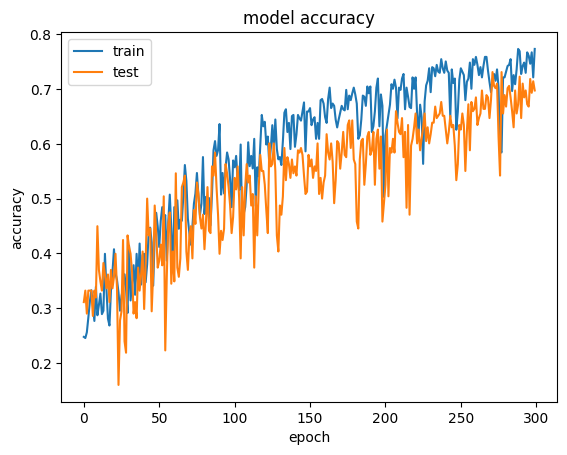

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:

pred_train= model.predict(X_train)
scores = model.evaluate(X_train, y_train, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))   
 
pred_test= model.predict(X_test)
scores2 = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))    

23/23 [==============================] - 0s 2ms/step
Accuracy on training data: 0.755215585231781% 
 Error on training data: 0.244784414768219
6/6 [==============================] - 0s 5ms/step
Accuracy on test data: 0.7277777791023254% 
 Error on test data: 0.27222222089767456


In [27]:
#3~18
goodic = {}
import numpy as np
import random
def run(rowIdx):
    global goodic

    original = df.loc[rowIdx:rowIdx][usableNumerical[1:]+usableOnehot].values
    #print(original)
    try:
        originIdx= np.where(original[0][2:18]==1)[0]
    except IndexError:
        print(original ,rowIdx)
        return 0

    for k in range(0,16):
        #print(original)
        real_test= model.predict(original)
        originaldf = pd.DataFrame(original, columns = usableNumerical[1:]+usableOnehot)
        print(originaldf.head(),real_test[0].round(3))
        gooName = gooList[k]
        predVal =list(real_test[0]).index(max(real_test[0]))
        if(k == originIdx):
            #print("original",gooName,"is",predVal)
            try:
                goodic[gooName] += predVal
            except KeyError:
                goodic[gooName] = predVal
        else:
            #print(k,"is predicting",gooName,"is",predVal)
            try:
                goodic[gooName] += predVal
            except KeyError:
                goodic[gooName] = predVal
        original[0][k+2] = 0
        original[0][k+3] = 1

for i in range(1):
    run(random.randrange(1,800))

print( )

1/1 [==============================] - 0s 50ms/step
   total_rain  duration  강서구  금정구  기장군   남구   동구  동래구  부산진구   북구  ...  해운대구  \
0       386.0      21.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...   0.0   

    고니   나비   뎬무  라마순   루사   매미   산바   없음  에위니아  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   0.0  

[1 rows x 27 columns] [0.478 0.014 0.001 0.493 0.015]
1/1 [==============================] - 0s 49ms/step
   total_rain  duration  강서구  금정구  기장군   남구   동구  동래구  부산진구   북구  ...  해운대구  \
0       386.0      21.0  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  ...   0.0   

    고니   나비   뎬무  라마순   루사   매미   산바   없음  에위니아  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   0.0  

[1 rows x 27 columns] [0.754 0.019 0.    0.181 0.046]
1/1 [==============================] - 0s 51ms/step
   total_rain  duration  강서구  금정구  기장군   남구   동구  동래구  부산진구   북구  ...  해운대구  \
0       386.0      21.0  0.0  0.0  1.0  0.0  0.0  0.0   0.0  0.0  ...   0.0   

    고니   나비   뎬무  라마순   루사   매미   산바   없음  에위니아  
0  0.0 

In [16]:
goodic

{'강서구': 0,
 '금정구': 0,
 '기장군': 4,
 '남구': 0,
 '동구': 0,
 '동래구': 0,
 '부산진구': 4,
 '북구': 4,
 '사상구': 0,
 '사하구': 1,
 '서구': 0,
 '수영구': 3,
 '연제구': 0,
 '영도구': 4,
 '중구': 0,
 '해운대구': 0}

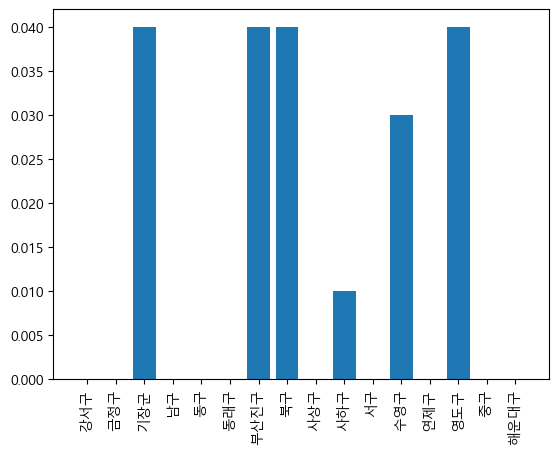

In [17]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc # 폰트 세팅을 위한 모듈 추가
font_path = "C:/Windows/Fonts/malgun.ttf" # 사용할 폰트명 경로 삽입
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)

names = list(goodic.keys())
values = list(map(lambda x:x/100,goodic.values()))

plt.bar(range(len(goodic)), values, tick_label=names)
plt.xticks(rotation='vertical')
plt.show()

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1792      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 5)                 85        
                                                                 
Total params: 4485 (17.52 KB)
Trainable params: 4485 (17.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
df[usableNumerical].sample(frac=0.1, replace=True)

,damage,total_rain,duration
155,4,244.5,1.0
50,4,220.0,21.0
237,0,365.5,8.0
514,3,437.5,8.0
539,3,508.0,21.0
...,...,...,...
808,4,78.0,4.0
37,4,157.5,8.0
93,4,264.5,6.0
638,2,387.0,21.0
